In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **In the exploratory data analysis the First thing we do is the inspection of the data** 
## So lets inspect the data

## For inspection we use info(),because info will tell us:  
1) how many total entries are there.
2) Total columns
3) The  datatype of customerID is object here because it is alphanumeric

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Replacing blanks with 0 as tenure is 0 and no total charges recorded..  
### we have change the dtype of total charges to float by replacing the blank spaces with 0


In [18]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype('float') 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [20]:
df.isnull() ##isnull returns true in the place where there will any null value
df.isnull().sum().sum()

np.int64(0)

### Now lets do some descriptive analysis using .describe()

In [21]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### lets check for duplicate too

In [22]:
df.duplicated().sum()
## at everytime we don't check the duplicate in rowise ## we also check the duplicate for like if there occurs more than one entry for the same person
## We sould also check the duplicate on the basis of something that occurs unique in our table .ie customer id is unique in our data so lets check duplicate on it.

np.int64(0)

In [23]:
df["customerID"].duplicated().sum()

np.int64(0)

#### The value in the Senior Citizen column is 0 Or 1 so  lets change to Yes or No.To make it easier to understand

In [24]:
def conv(value):
    if value==1:
        return "yes"
    else:
        return "no"
df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)

In [25]:
df.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# Now Let's come to the analysis part 

##In Analysis part,First of all we try to understand the follow things  
##We the custromer have churn out  
##Why the customer have stop using the service  
##We will also try to understand the characteristic of that customer

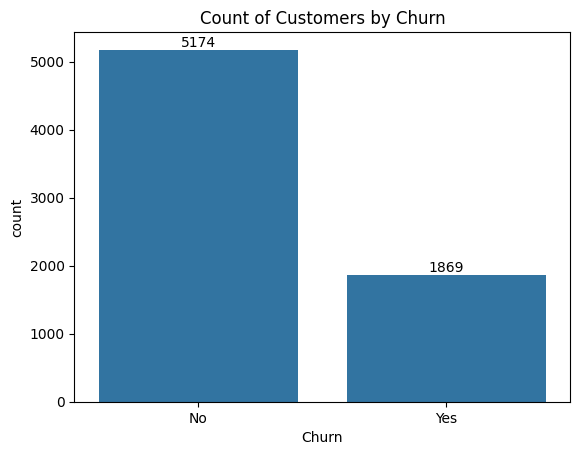

In [33]:
ax= sns.countplot(x=df['Churn'],data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

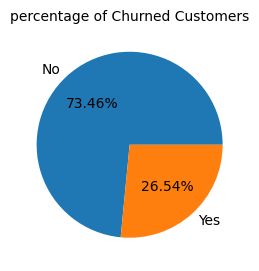

In [36]:
plt.figure(figsize=(3,4))
gb=df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'],labels=gb.index,autopct="%1.2f%%")
plt.title("percentage of Churned Customers",fontsize=10)
plt.show()

#### From the give pie chart we can conclude 26.54 % have churned  
##### Now lets explore the reason behind it

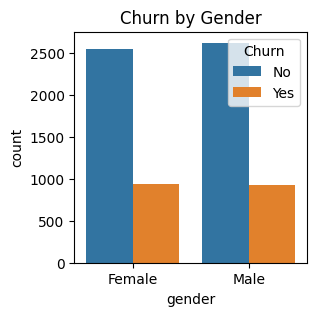

In [46]:
plt.figure(figsize=(3,3))
sns.countplot(x=df["gender"],data=df,hue="Churn")
plt.title("Churn by Gender")
plt.show()

#### From the above we can conclude that Females have slightly more churned out rate than male.

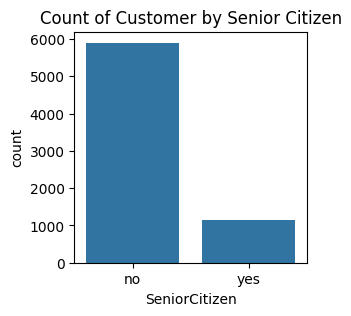

In [60]:
plt.figure(figsize=(3,3))
sns.countplot(x="SeniorCitizen",data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Senior Citizen")
plt.show()

<Figure size 300x300 with 0 Axes>

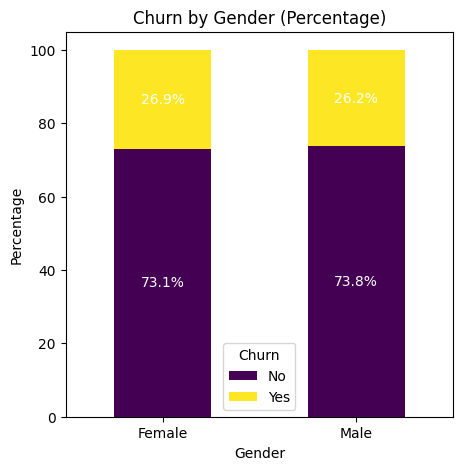

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Compute normalized counts (percentages)
grouped = df.groupby(["gender", "Churn"]).size().unstack()
grouped_percent = grouped.div(grouped.sum(axis=1), axis=0) * 100  # Convert to percentage

# Plot
plt.figure(figsize=(3, 3))
ax = grouped_percent.plot(kind="bar", stacked=True, colormap="viridis", figsize=(5, 5))

# Add percentage labels
for bar_container in ax.containers:
    ax.bar_label(bar_container, fmt="%.1f%%", label_type="center", fontsize=10, color="white")

plt.title("Churn by Gender (Percentage)")
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.legend(title="Churn")
plt.xticks(rotation=0)
plt.show()

##### comparatively a greater percentage of people in senior citizen category have churned.

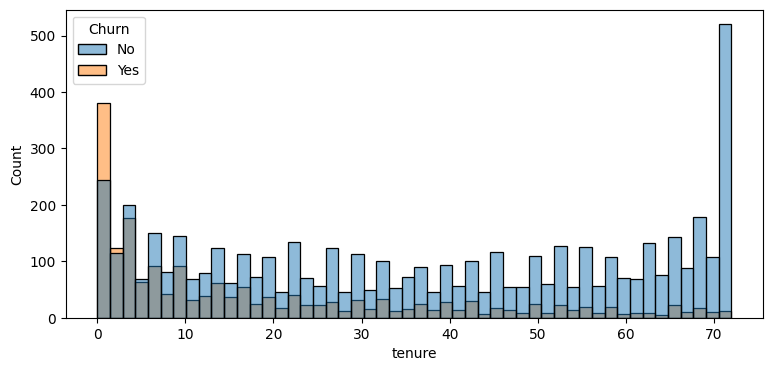

In [66]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure",data=df,bins=50,hue="Churn")
plt.show()

#### From here we can conclude that most of the people  who had   used our service for  long time had stayed and out and  
#### people who have used our services #1 or2 months have churned

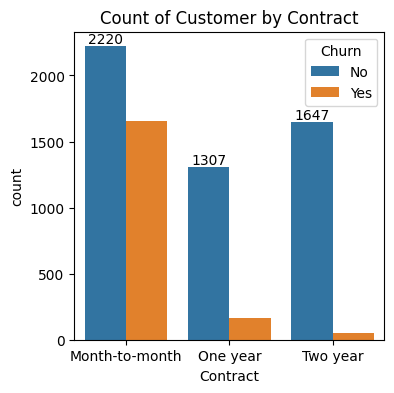

In [70]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="Contract",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Contract")
plt.show()

#### We can notice that the  churned out percentage is more for the people who took month to month contract

In [71]:
 df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

######  NOW WE ARE CREATING THE SUBPLOTS  
###### Here since we took 9 columns so we will get 9 subplots

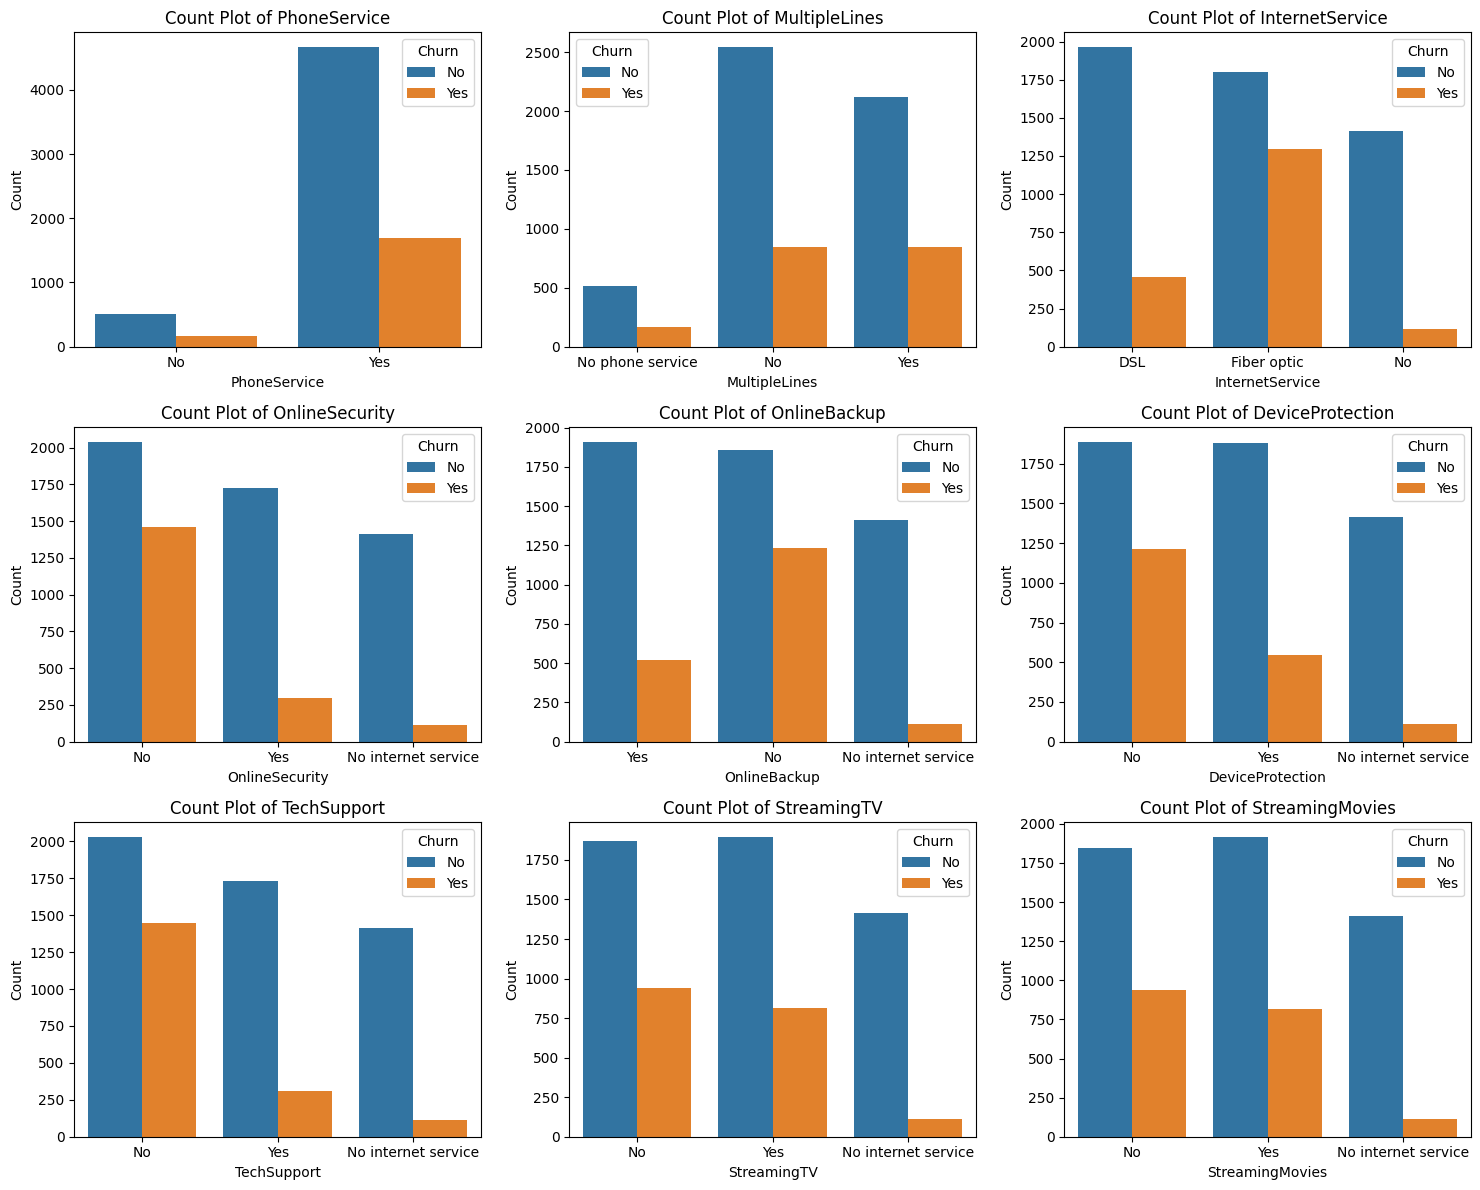

In [79]:

categorical_cols = ['PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies']

# Define subplot grid size
num_cols = 3  # Number of columns per row
num_rows = (len(categorical_cols)+num_cols-1) // num_cols  # Ceiling division to get number of rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15,num_rows* 4))
axes = axes.flatten()  # Flatten to 1D array for easy iteration

# Generate countplots
for i, col in enumerate(categorical_cols):
    sns.countplot(x=df[col],data=df, ax=axes[i],hue=df["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Hide empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

In [80]:
# #  Customers with No additional services (like Online Security, Tech Support, or Device Protection) tend to have a higher churn rate. 
# Fiber optic internet users show a relatively higher 
# churn rate compared to DSL users. Overall, customers with basic services or no additional features are more likely to leave compared to those with bundled services.

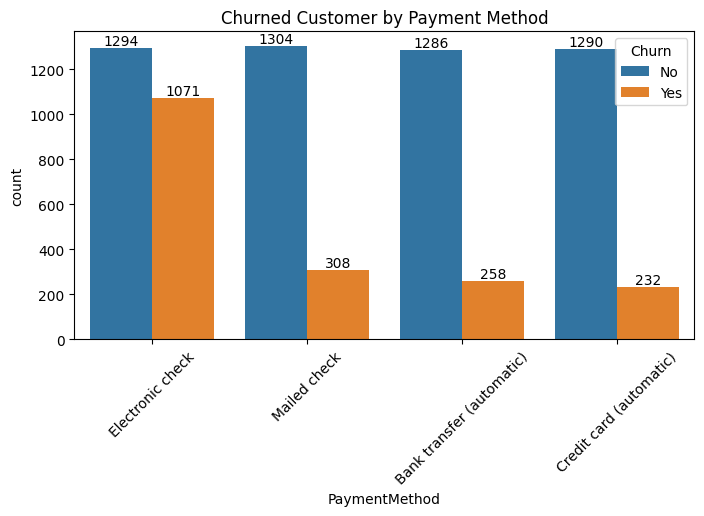

In [86]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x="PaymentMethod",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customer by Payment Method")
plt.xticks(rotation=45)
plt.show()

### Customer is likely to churned  when he is using electronic as a  payment method.